
### CUSTOMER SEGMENTATION USING RFM MODELLING

In [1]:
### Import Libraries and Load Data
import pandas as pd
import datetime as dt
from sklearn.cluster import KMeans

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\ADMIN\Desktop\Customer Segmentation Project\Sterling E-Commerce Data - Customer Segmentation Project 2.xlsx")
df.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [3]:
df.tail()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
283078,Women's Fashion,Burkettsville,Mercer,81251,2013-10-15,2021-12-30,"Kester, Apolonia",F,700522,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,69.8
283079,Women's Fashion,Burkettsville,Mercer,81251,2013-10-15,2021-12-30,"Kester, Apolonia",F,700518,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,69.9
283080,Women's Fashion,Burkettsville,Mercer,81251,2013-10-15,2021-12-30,"Kester, Apolonia",F,700520,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,79.8
283081,Women's Fashion,Burkettsville,Mercer,81251,2013-10-15,2021-12-30,"Kester, Apolonia",F,700517,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,79.9
283082,Women's Fashion,Burkettsville,Mercer,81251,2013-10-15,2021-12-30,"Kester, Apolonia",F,700519,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,79.9


In [4]:
# fixing columns names
df.columns =[c.replace(" ", "_") for c in df.columns] # replace empty space between names with underscore

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust_Id         283083 non-null  int64         
 4   Customer_Since  283083 non-null  datetime64[ns]
 5   Date_of_Order   283083 non-null  datetime64[ns]
 6   Full_Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item_Id         283083 non-null  int64         
 9   Order_Id        283078 non-null  float64       
 10  Payment_Method  283083 non-null  object        
 11  Place_Name      283083 non-null  object        
 12  Ref_Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [6]:
df.columns

Index(['Category', 'City', 'County', 'Cust_Id', 'Customer_Since',
       'Date_of_Order', 'Full_Name', 'Gender', 'Item_Id', 'Order_Id',
       'Payment_Method', 'Place_Name', 'Ref_Num', 'Region', 'State',
       'User_Name', 'Zip', 'Qty_Ordered', 'Total'],
      dtype='object')

In [7]:
{x: len(df[x].unique())for x in df.columns}

{'Category': 15,
 'City': 15668,
 'County': 2518,
 'Cust_Id': 63646,
 'Customer_Since': 11629,
 'Date_of_Order': 365,
 'Full_Name': 63610,
 'Gender': 2,
 'Item_Id': 283083,
 'Order_Id': 199330,
 'Payment_Method': 13,
 'Place_Name': 15668,
 'Ref_Num': 61505,
 'Region': 4,
 'State': 49,
 'User_Name': 63407,
 'Zip': 33440,
 'Qty_Ordered': 72,
 'Total': 23588}

In [8]:
# Statistical Analysis of the data
df.describe()

,Cust_Id,Item_Id,Order_Id,Ref_Num,Zip,Qty_Ordered,Total
count,283083.000000,283083.000000,2.830780e+05,283083.000000,283083.000000,283083.000000,283083.000000
mean,70106.816026,741747.110628,1.004570e+08,561107.885991,49147.171374,3.008224,816.230712
std,30215.394879,95664.609013,6.090992e+04,256101.205409,27235.561738,4.565168,1986.164932
min,4.000000,574769.000000,1.003547e+08,111127.000000,210.000000,1.000000,0.000000
25%,56640.000000,659898.500000,1.004047e+08,341071.000000,26264.000000,2.000000,49.900000
50%,74320.000000,742471.000000,1.004518e+08,565623.000000,48808.000000,2.000000,149.800000
75%,92371.000000,826078.500000,1.005134e+08,782211.000000,72004.000000,3.000000,800.000000
max,115326.000000,905208.000000,1.005624e+08,999981.000000,99402.000000,501.000000,101262.590000


In [9]:
df.describe(exclude=["int64", "float64"]).T

,count,unique,top,freq,first,last
Category,283083,15,Mobiles & Tablets,60954,NaT,NaT
City,283083,15668,Dekalb,2525,NaT,NaT
County,283083,2518,Jefferson,3510,NaT,NaT
Customer_Since,283083,11629,2005-11-30 00:00:00,2536,1978-11-04,2017-07-28
Date_of_Order,283083,365,2021-12-20 00:00:00,13522,2021-10-01,2022-09-30
Full_Name,283083,63610,"Gonzalez, Joel",2524,NaT,NaT
Gender,283083,2,M,144295,NaT,NaT
Payment_Method,283083,13,cod,101750,NaT,NaT
Place_Name,283083,15668,Dekalb,2525,NaT,NaT
Region,283083,4,South,103482,NaT,NaT


In [10]:
df.shape

(283083, 19)

In [12]:
#Customer distribution by country
country_cust_data=df[['City','Cust_Id']].drop_duplicates()
country_cust_data.groupby(['City'])['Cust_Id'].aggregate('count').reset_index().sort_values('Cust_Id', ascending=False)

,City,Cust_Id
14750,Washington,487
6373,Houston,307
9681,New York City,257
4099,El Paso,234
3271,Dallas,199
...,...,...
11250,Pratts Hollow,1
5169,Gheens,1
11247,Prairieville,1
11246,Prairieton,1


Category          0
City              0
County            0
Cust_Id           0
Customer_Since    0
Date_of_Order     0
Full_Name         0
Gender            0
Item_Id           0
Order_Id          5
Payment_Method    0
Place_Name        0
Ref_Num           0
Region            0
State             0
User_Name         0
Zip               0
Qty_Ordered       0
Total             0
dtype: int64


<Axes: >

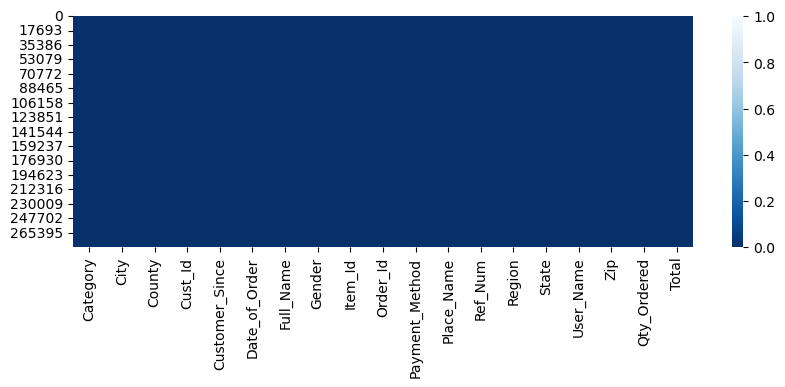

In [13]:
# Check for missing values
print(df.isnull().sum())

# Visualization the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

In [14]:
#dropping off missing data points
df.dropna(inplace=True)

In [15]:
#Validate if there are any negative values in Qty Required column
df['Qty_Ordered'].min()

1

In [16]:
#Filter out records with negative values
df = df[(df['Qty_Ordered']>0)]

In [17]:
#Validate if there are any negative values in Total column
df.Total.min()

0.0

In [18]:
df.shape

(283078, 19)

In [19]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    
    Barplot with p[ercentage at the top
    
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: display the top n cvategory levels (default is None, i.e., display all levels)
    """
    
    total = len(data[feature]) # length of the column
    count = data[feature]. nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
    x=feature,
    palette="Paired",
    order=data[feature].value_counts().index[:n].sort_values(),
    )
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) # percentage of each class of the category
        else:
            label = p.get_height() #count of each level of the category
        x = p.get_x() + p.get_width() /2 # width of the plot
        y = p.get_height() # height of the plot
        
        ax.annotate(
          label,
          (x,y),
          ha="center",
          va="center",
          size=12,
          xytext=(0,5),
          textcoords="offset points",
        ) # annotate the percentage
    plt.show # show the plot

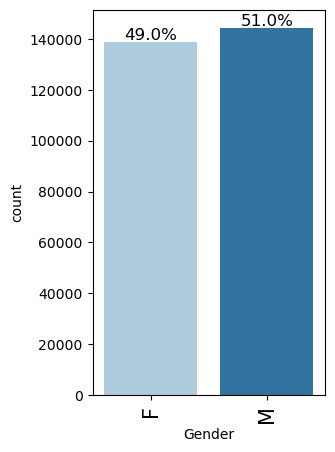

In [20]:
labeled_barplot(df, "Gender", perc=True)

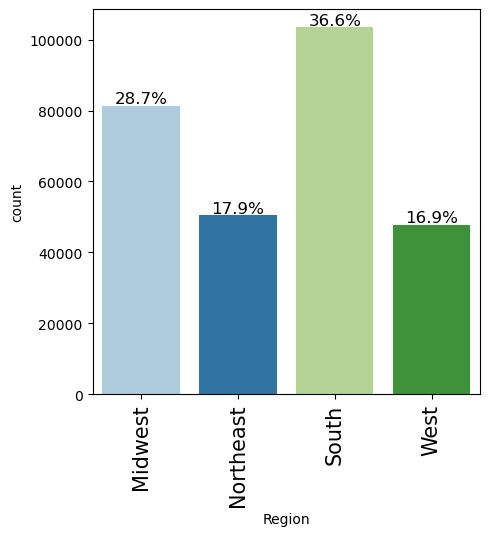

In [21]:
labeled_barplot(df, "Region", perc=True)

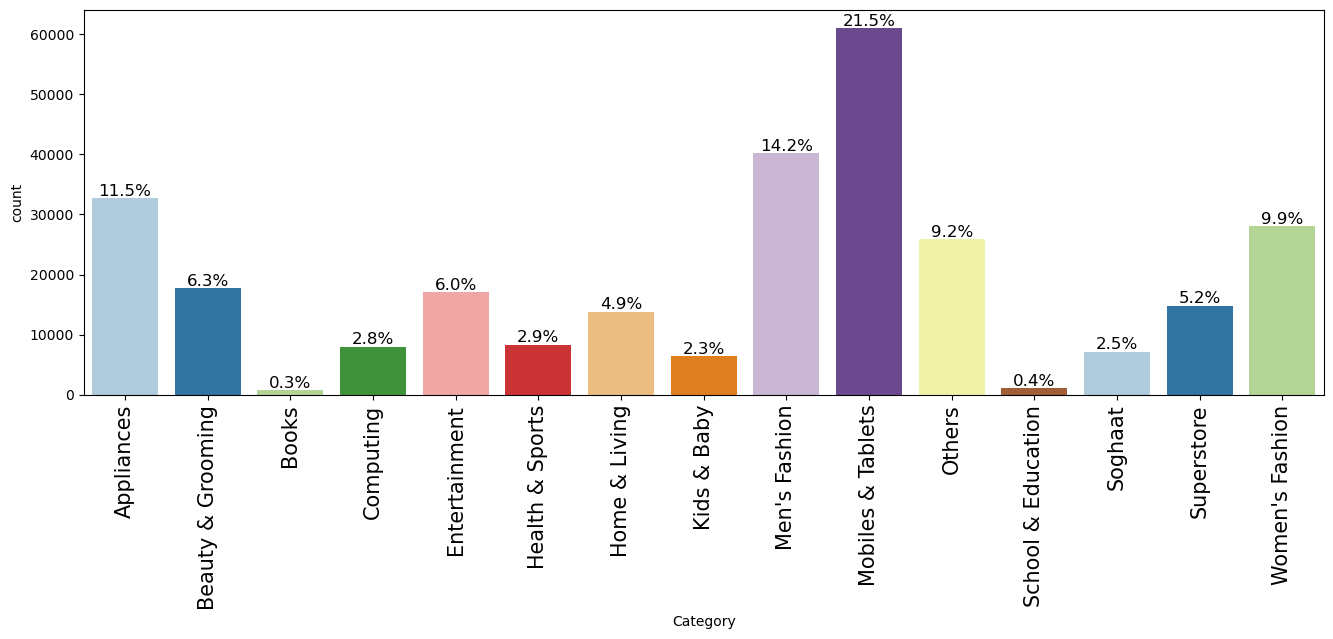

In [22]:
labeled_barplot(df, "Category", perc=True)

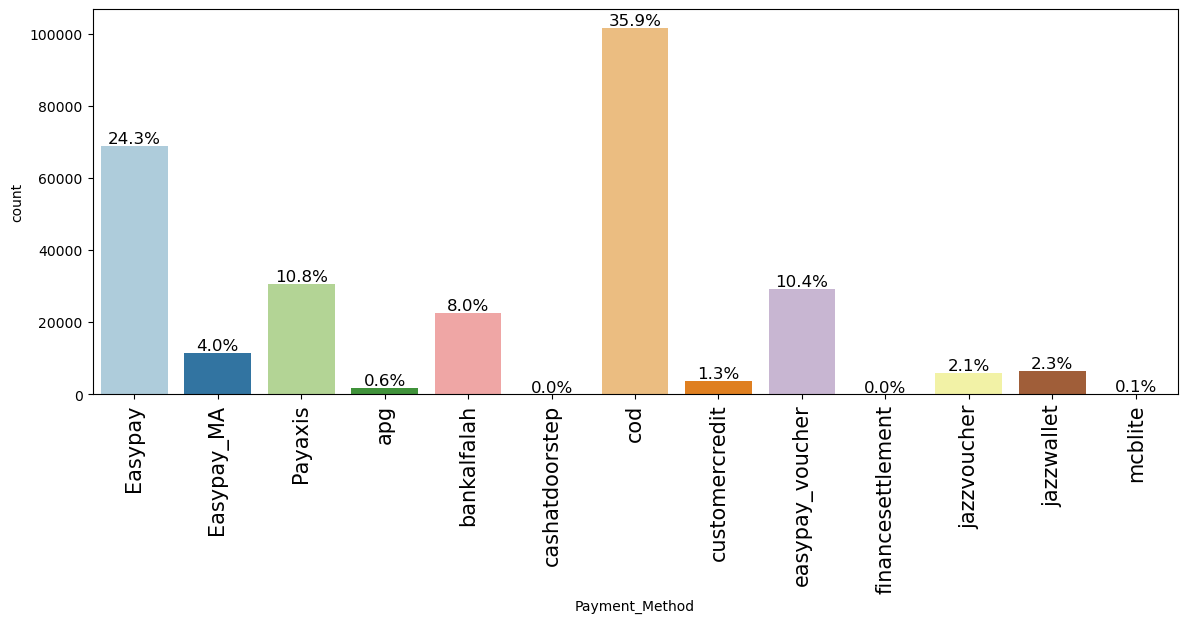

In [23]:
labeled_barplot(df, "Payment_Method", perc=True)

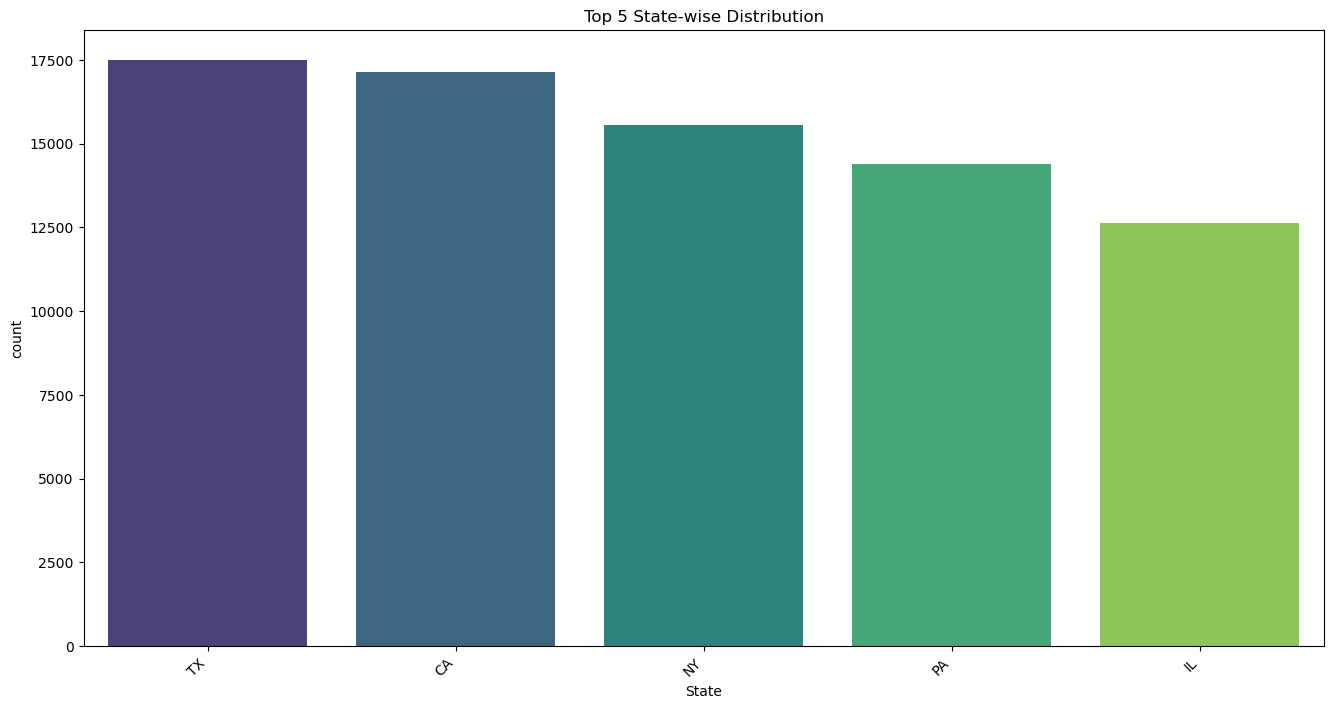

In [24]:
### State-wise Distribution
# Get the top 5 states based on customer count
top_5_states = df['State'].value_counts().head(5).index

# Filter the DataFrame for the top 15 states
df_top_5_states = df[df['State'].isin(top_5_states)]

# Bar chart for top 5 state-wise distribution
plt.figure(figsize=(16, 8))
sns.countplot(x='State', data=df_top_5_states, palette='viridis', order=top_5_states)
plt.title('Top 5 State-wise Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

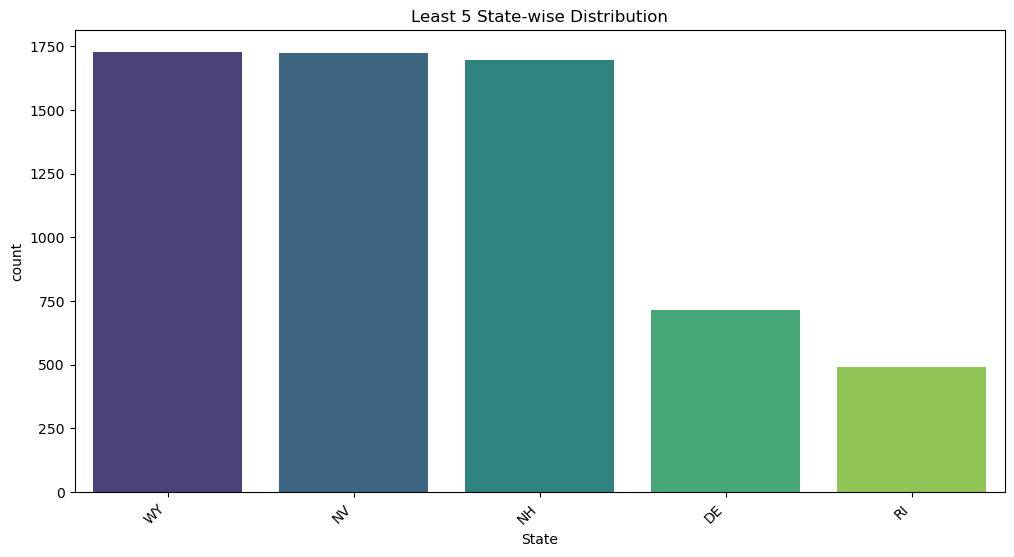

In [25]:
# Get the least 5 states based on customer count
least_5_states = df['State'].value_counts().tail(5).index

# Filter the DataFrame for the least 5 states
df_least_5_states = df[df['State'].isin(least_5_states)]

# Bar chart for least 5 state-wise distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df_least_5_states, palette='viridis', order=least_5_states)
plt.title('Least 5 State-wise Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
# Calculate the average of numerical variables
avg_qty_ordered = df['Qty_Ordered'].mean()
avg_total_sales = df['Total'].mean()

print(f'Average Qty_Ordered: {avg_qty_ordered}')
print(f'Average Total Sales: {avg_total_sales}')

Average Qty_Ordered: 3.0082380121379972
Average Total Sales: 816.232342064802


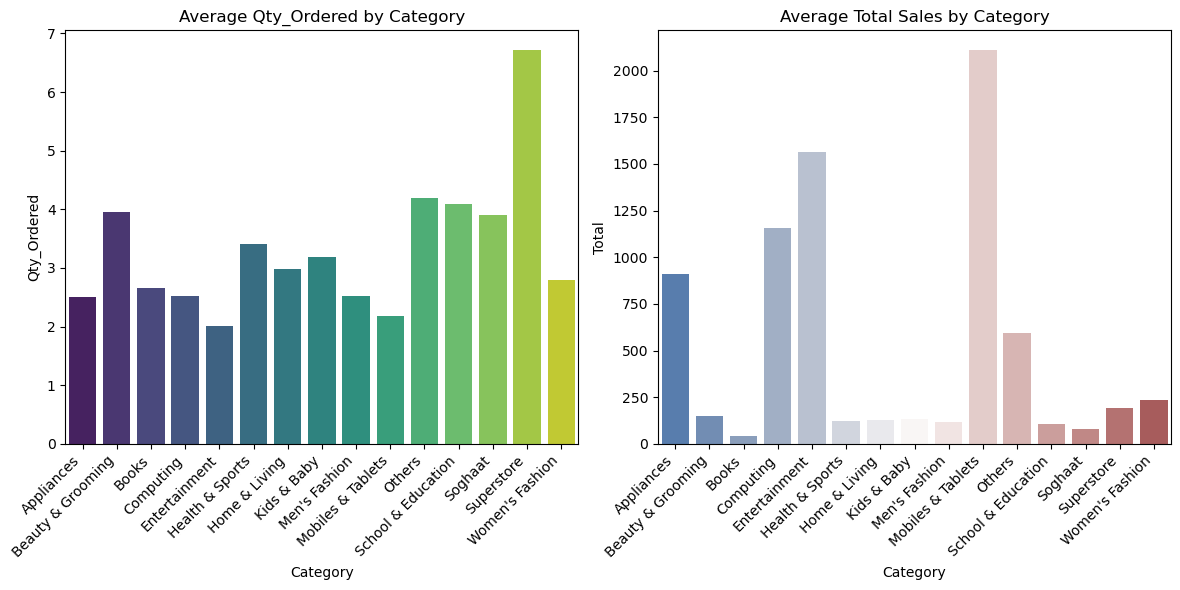

In [27]:
# Calculate average values by category
avg_values_by_category = df.groupby('Category')[['Qty_Ordered', 'Total']].mean().reset_index()

# Bar chart for average quantity ordered and total sales by category
plt.figure(figsize=(12, 6))

# Bar chart for Average Qty Ordered
plt.subplot(1, 2, 1)
sns.barplot(x='Category', y='Qty_Ordered', data=avg_values_by_category, palette='viridis')
plt.title('Average Qty_Ordered by Category')
plt.xticks(rotation=45, ha='right')

# Bar chart for Average Total Sales
plt.subplot(1, 2, 2)
sns.barplot(x='Category', y='Total', data=avg_values_by_category, palette='vlag')
plt.title('Average Total Sales by Category')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

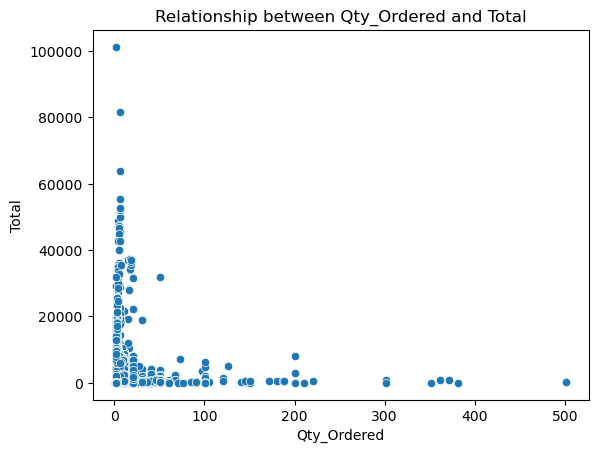

In [28]:
sns.scatterplot(x='Qty_Ordered', y='Total', data=df)
plt.xlabel('Qty_Ordered')
plt.ylabel('Total')
plt.title('Relationship between Qty_Ordered and Total')
plt.show()

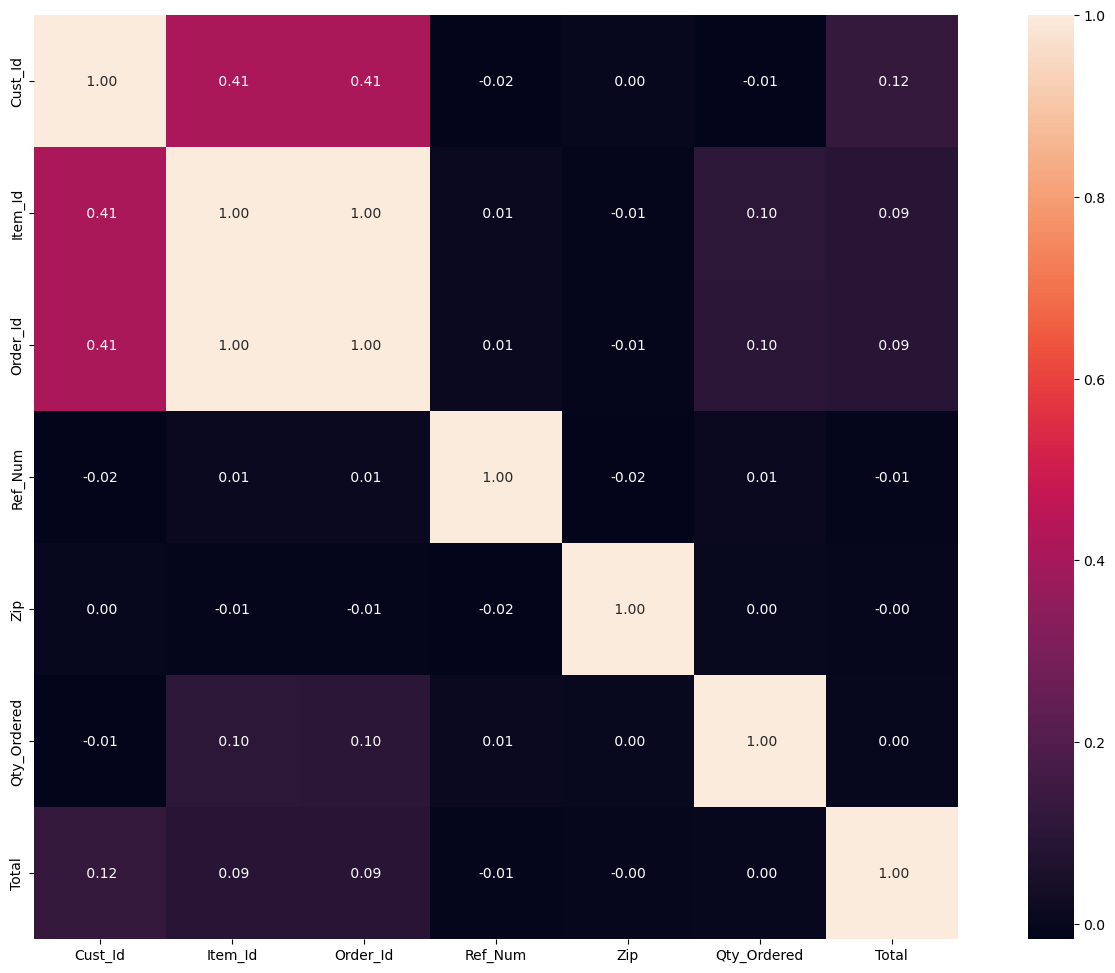

In [29]:
# Correlation between the variables in the dataset
plt.figure(figsize = (18, 12))
hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt=' .2f', annot_kws={'size': 10})

### Data Preprocessing
Create relevant features for RFM analysis (Recency, Frequency and Monetary)

In [30]:
df.Date_of_Order.value_counts()

2021-12-20    13522
2021-12-27    13042
2021-12-21     7154
2022-04-30     6207
2021-12-28     5284
              ...  
2022-07-20      133
2022-09-25      129
2021-10-20      122
2022-09-30       99
2022-09-24       92
Name: Date_of_Order, Length: 365, dtype: int64

In [31]:
df.Customer_Since.value_counts()

2005-11-30    2536
2017-02-08     774
2015-05-17     659
2017-06-11     541
2016-12-25     491
              ... 
1981-08-01       1
1993-02-13       1
1989-01-01       1
1983-12-21       1
1992-06-10       1
Name: Customer_Since, Length: 11629, dtype: int64

In [33]:
#Recency = Latest Date - Last Date of Order, Frequency = count of Order Id of transaction(s), Monetary = Sum of Total for each customer
import datetime as dt

#Set Latest date 10/01/2022 as last Date of Order was 09/30/2022. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2022,10,1)

#Create RFM Modelling scores for each customer
rfm = df.groupby('Cust_Id').agg({'Date_of_Order': lambda x: (Latest_Date - x.max()).days, 'Order_Id': lambda x: len(x), 'Total': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm['Date_of_Order'] = rfm['Date_of_Order'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm.rename(columns={'Date_of_Order': 'Recency', 
                         'Order_Id': 'Frequency', 
                         'Total': 'Monetary'}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
Cust_Id,,,
4,2,41,27394.190
15,232,6,216.800
16,323,20,11868.899
20,2,11,28719.018
21,240,1,105.000


### K-Means Clustering
Feature scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

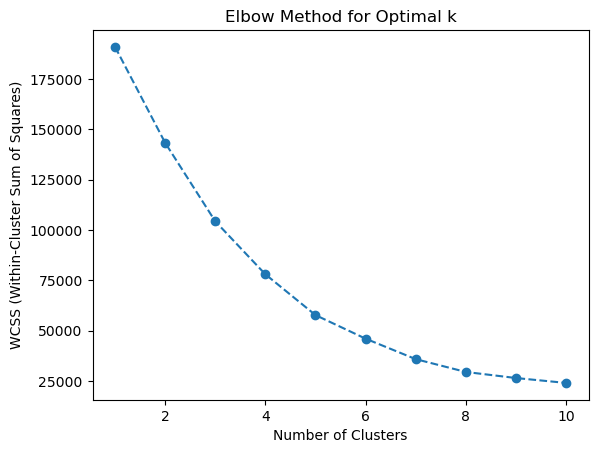

In [35]:
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [36]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(rfm_scaled)

#Find the clusters for the observation given in the dataset
rfm['Cluster'] = KMean_clust.labels_
rfm.head()

,Recency,Frequency,Monetary,Cluster
Cust_Id,,,,
4,2,41,27394.190,1
15,232,6,216.800,0
16,323,20,11868.899,0
20,2,11,28719.018,1
21,240,1,105.000,0


In [37]:
final=rfm.groupby("Cluster")["Recency","Frequency","Monetary"].mean()
final

,Recency,Frequency,Monetary
Cluster,,,
0,281.528499,3.199743,1982.822826
1,125.868176,5.055269,3911.085396
2,49.311828,148.623656,393085.786848


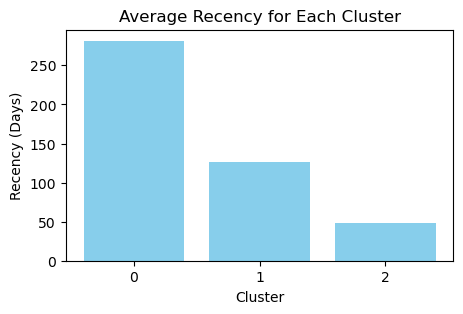

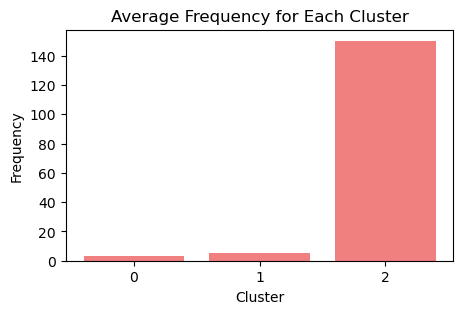

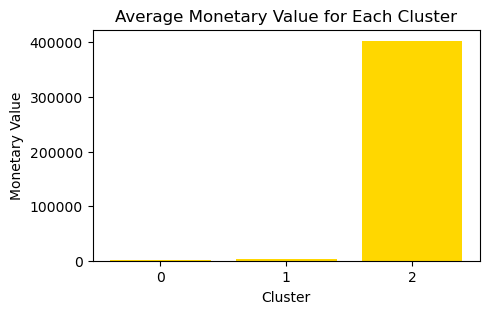

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your cluster average data is in a DataFrame named 'clusters_average_data'
data = {
    'Cluster': ['0', '1', '2'],
    'Recency': [281.53, 125.87, 47.79],
    'Frequency': [3.20, 5.07, 150.17],
    'Monetary': [1982.68, 3930.03, 403036.66]
}

cluster_average_data = pd.DataFrame(data)

# Plotting Recency
plt.figure(figsize=(5, 3))
plt.bar(cluster_average_data['Cluster'], cluster_average_data['Recency'], color='skyblue')
plt.title('Average Recency for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency (Days)')
plt.show()

# Plotting Frequency
plt.figure(figsize=(5, 3))
plt.bar(cluster_average_data['Cluster'], cluster_average_data['Frequency'], color='lightcoral')
plt.title('Average Frequency for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

# Plotting Monetary
plt.figure(figsize=(5, 3))
plt.bar(cluster_average_data['Cluster'], cluster_average_data['Monetary'], color='gold')
plt.title('Average Monetary Value for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary Value')
plt.show()

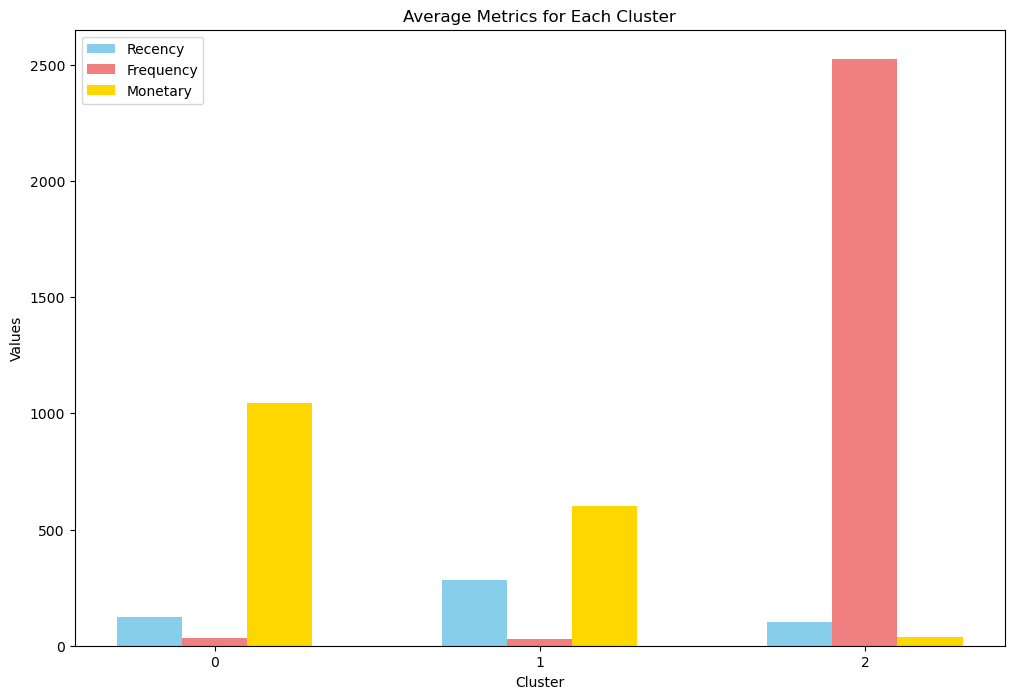

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your cluster average data is in a DataFrame named 'cluster_average_data'
data = {
    'Cluster': ['0', '1', '2'],
    'Recency': [125, 282, 103],
    'Frequency': [35, 29, 2524],
    'Monetary': [1045.27, 601.67, 36.23] 
}

cluster_average_data = pd.DataFrame(data)

# Plotting all metrics in one chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
bar_positions_recency = range(len(cluster_average_data))
bar_positions_frequency = [pos + bar_width for pos in bar_positions_recency]
bar_positions_monetary = [pos + bar_width for pos in bar_positions_frequency]

ax.bar(bar_positions_recency, cluster_average_data['Recency'], width=bar_width, label='Recency', color='skyblue')
ax.bar(bar_positions_frequency, cluster_average_data['Frequency'], width=bar_width, label='Frequency', color='lightcoral')
ax.bar(bar_positions_monetary, cluster_average_data['Monetary'], width=bar_width, label='Monetary', color='gold')

ax.set_xticks([pos + bar_width for pos in bar_positions_recency])
ax.set_xticklabels(cluster_average_data['Cluster'])
ax.set_xlabel('Cluster')
ax.set_ylabel('Values')
ax.set_title('Average Metrics for Each Cluster')
ax.legend()

plt.show()

In [41]:
def func(row):
    if row["Cluster"]==0:
        return 'Silver'
    elif row["Cluster"]==1:
        return 'Gold'
    else:
        return 'Platinum'
    
    
rfm['group'] = rfm.apply(func, axis=1)
rfm

,Recency,Frequency,Monetary,Cluster,group
Cust_Id,,,,,
4,2,41,27394.190,1,Gold
15,232,6,216.800,0,Silver
16,323,20,11868.899,0,Silver
20,2,11,28719.018,1,Gold
21,240,1,105.000,0,Silver
...,...,...,...,...,...
115322,1,2,209.600,1,Gold
115323,1,1,4419.900,1,Gold
115324,1,1,39.900,1,Gold


In [43]:
result=rfm.group.value_counts()
result

Gold        35517
Silver      28036
Platinum       93
Name: group, dtype: int64

<Axes: >

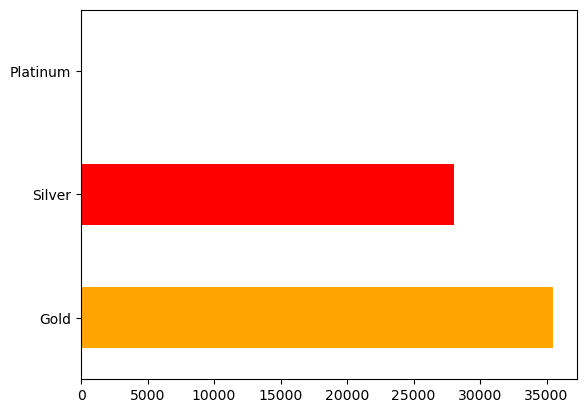

In [44]:
result.plot(kind="barh", color=["Orange","Red","Green"])

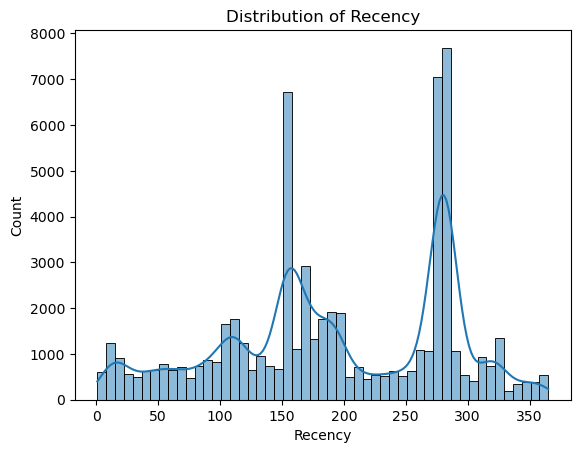

In [46]:
sns.histplot(rfm['Recency'], kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.show()

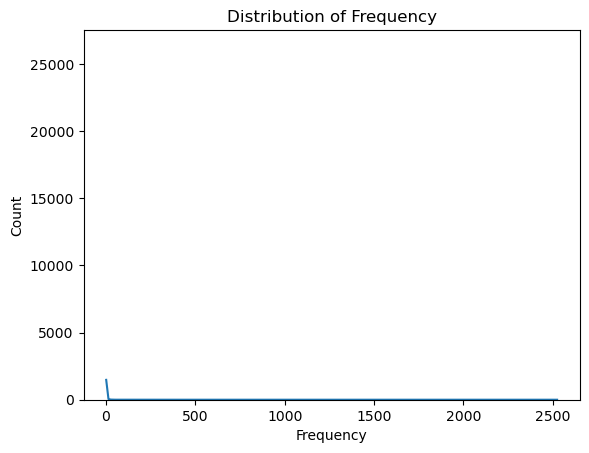

In [47]:
sns.histplot(rfm['Frequency'], kde=True)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.show()

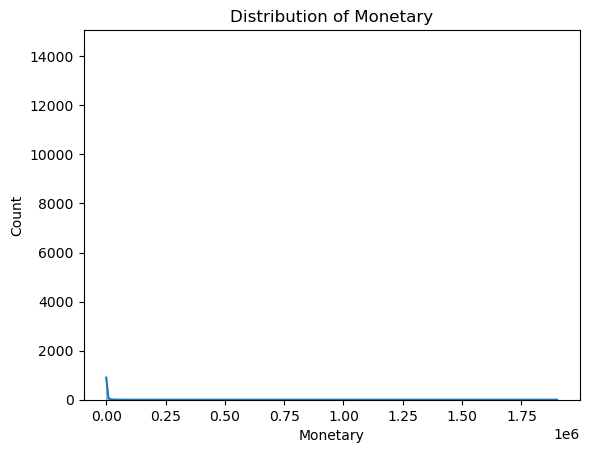

In [48]:
sns.histplot(rfm['Monetary'], kde=True)
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')
plt.show()

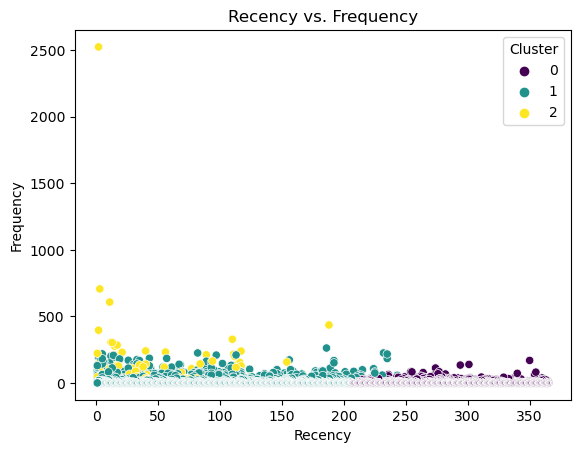

In [49]:
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Recency vs. Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

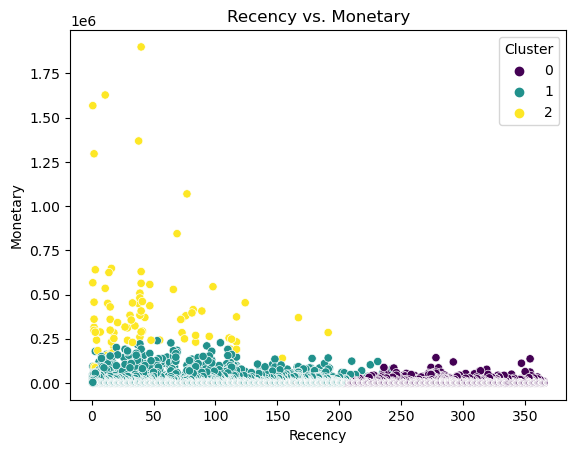

In [50]:
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Recency vs. Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

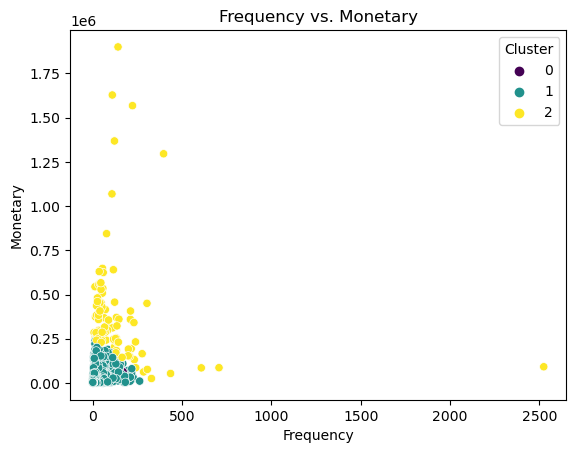

In [51]:
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

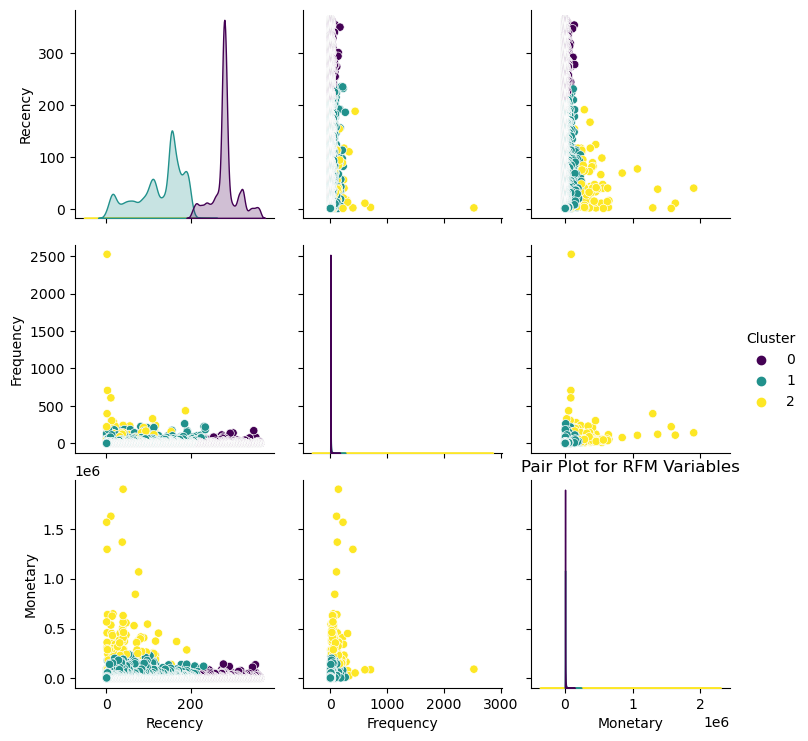

In [52]:
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary', 'Cluster']], hue='Cluster', palette='viridis')
plt.title('Pair Plot for RFM Variables')
plt.show()

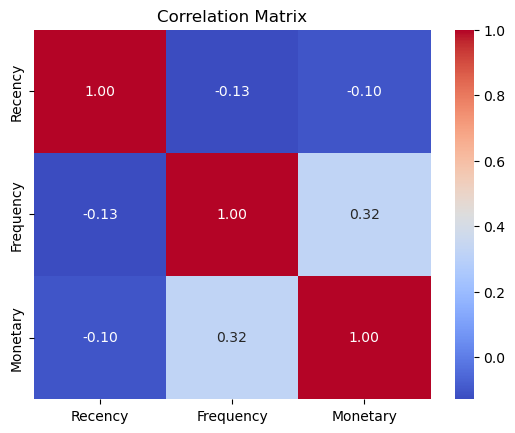

In [53]:
corr_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

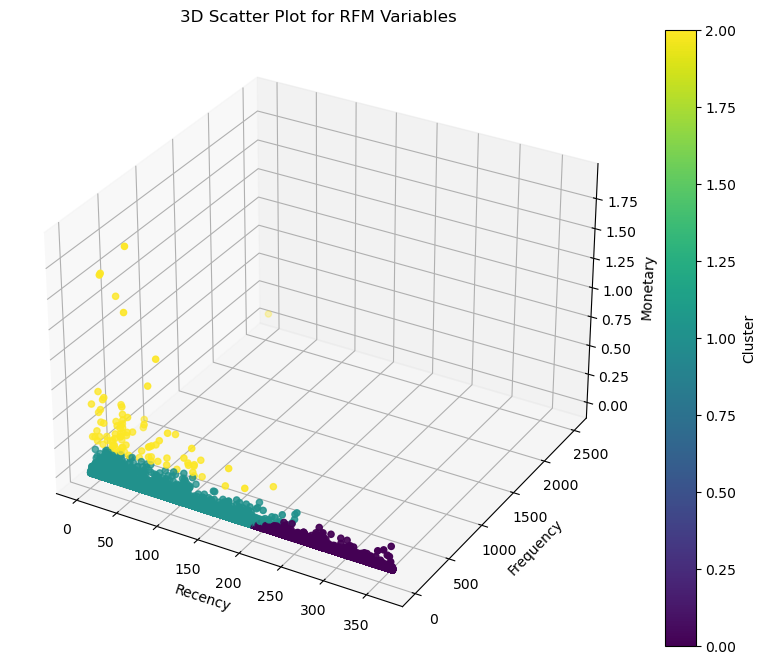

In [55]:
# Multivariate analysis with a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot for RFM Variables')
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

# Key Insights:

 Cluster Average

## Cluster 0 (Silver):

- Recency: 282 days
- Frequency: 3 times
- Monetary: $1982.62
    
    
## Cluster 1 (Gold):

- Recency: 126 days
- Frequency: 5 times
- Monetary: $3911.09
    
    
    
    
## Cluster 2 (Platinum):

- Recency: 49 days
- Frequency: 149 times
- Monetary: $393,085.79

# Conclusions:


This RFM customer segmentation analysis provides a roadmap for strategic decision-making, enabling organizations to tailor marketing efforts, improve customer experiences, and maximize the value of each segment. By implementing targeted strategies for Silver, Gold, and Platinum customers, you can foster customer loyalty, drive revenue growth, and position your brand as a leader in the market.


# Recommendations:


Based on the key insights, we propose the following strategies for business growth:

## 1. Regional Targeting: 

Given the regional distribution, focus marketing efforts on the South and Midwest regions, where a significant customer base exists. Tailor promotions and campaigns to resonate with the preferences of customers in these regions.


## 2. Payment Method Optimization: 

Recognize the dominance of "cod" transactions and EasyPay. Consider incentivizing the use of other payment methods to diversify and streamline the payment process for both the business and customers.


## 3.Cluster-specific Marketing:


Based on the key insights and the given cluster average data, here are recommendations for each segment:

## Silver Segment (Cluster 0):

### Recency: 

Customers in this segment have a high recency score (282 days), indicating that they haven't visited the platform recently. It's recommended to implement targeted re-engagement strategies such as personalized promotions, discounts, or reminders to encourage them to return and make a purchase. With a higher recency compared to the other segments, consider targeted promotions or loyalty programs to re-engage this group.


### Frequency: 

The frequency is relatively low (3 times), suggesting that they make occasional purchases. Consider offering loyalty programs, exclusive deals, or product recommendations based on their past purchases to increase their engagement and encourage more frequent transactions. Craft compelling campaigns to convert occasional customers into regular ones. Highlighting the potential benefits and value propositions can be effective.


### Monetary: 

The monetary value is moderate ($1,982.82), so efforts can be made to upsell or cross-sell to increase the average order value. Special promotions or bundled deals might be effective in boosting their spending.


## Gold Segment (Cluster 1):


###	Recency: 

Customers in this segment have a moderate recency score (126 days), indicating recent visits. Ensure to maintain their engagement by providing personalized recommendations, exclusive offers, or early access to new products.


###	Frequency: 

The frequency is high (5 times), suggesting they make frequent purchases. Leverage this by introducing loyalty programs, referral bonuses, or special discounts for repeat purchases to foster customer loyalty. Focus on maintaining the loyalty of this segment through personalized offers and exclusive deals, given their moderate recency but higher frequency and monetary value.


###	Monetary: 

The monetary value is high ($3,911.09), implying they spent a significant amount. Capitalize on this by offering premium products, VIP access, or personalized services to enhance their shopping experience.


## Platinum Segment (Cluster 2):


###	Recency: 

Customers in this segment have a very low recency score (49 days), indicating they have visited the platform recently. Implement targeted campaigns, personalized promotions, or exclusive offers to engage them.


###	Frequency: 

The frequency is extremely high (149 times), indicating they made frequent purchases in the past. Investigate reasons for the drop in frequency and tailor marketing efforts to reignite their interest, such as personalized recommendations or special incentives for returning customers. Build a close relationship with these top-tier customers through exclusive communications, seeking feedback, and involving them in brand initiatives.


###	Monetary: 

The monetary value is exceptionally high ($393,085.79), suggesting they have a significant lifetime value. Develop personalized loyalty programs, exclusive perks, or premium services to maintain their high spending and enhance their overall satisfaction. Prioritize VIP treatment for this high-value segment. Consider premium services, early access, or personalized experiences to enhance their loyalty further.


# 4. Enhanced Customer Communication: 

Utilize customer segments to craft targeted and personalized communication strategies. Tailor marketing messages, promotions, and product recommendations based on the preferences and behaviors of each segment.


# 5. Continuous Monitoring and Adaptation: 

Regularly analyze customer segments and adapt strategies based on evolving trends. Stay agile to respond to changes in customer behavior and market dynamics.


By implementing these recommendations, our company can optimize customer engagement, drive sales, and maintain a competitive edge in the e-commerce industry.
